In [ ]:
!pip install numpy scikit-learn pandas

## Занятие 3. Введение в ML. Работа с большими данными. Задача классификации

## Часть 1. Анализ данных

In [100]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/evgpat/edu_stepik_practical_ml/main/datasets/titanik.csv", delimiter=';')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


### Шаг 0. Вспомогательные преобразования. Создание новых признаков

1. Переведем пол в 0 и 1
- Подсказка: df['Sex'] = df['Sex'].apply(lambda x: 1 if x == 'male' else 0)

2. Выкинем столбец `PassengerId`, так как он не несет полезной информации

3. Выкинем столбец `Ticket`, так как это аналог id пассажира - у каждого билета уникальный номер

In [59]:
# Ваш код


Работа по созданию новых признаков: 
- Name — колонка с именами пассажиров Титаника. Информативен в этом признаке титул (Miss/Mr/Ms) пассажира. 
- Прежде чем удалить эту колонку из данных, давайте проверим корреляцию между этим признаком и целевой переменной (колонкой Survived).

In [ ]:
# df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
# pd.crosstab(df['Title'], df['Sex'])

- Есть некоторые титулы, которые встречаются нечасто. Давайте редкие титулы заменим на один класс, назовем его "Rare"
- Подсказка: df.Neme.replace('old_name', 'new_name')

### Шаг 1. Продвинутая работа с пропущенными значениями

В реальных данных часто встречаются пропуски. Ранее мы просто удаляли их, но такой подход не очень эффективен. Игнорирование пропущенных данных может привести к искажению результатов, поэтому важно правильно обрабатывать такие значения. Важно понимать, что большая часть моделей ML не работает с пропусками, что приводит к ошибкам в подсчетах.
 
Разберем возможные стратегии.

Первоначально стоит оценить долю пропусков в столбце:

- **Мало пропусков** (≤1-2%) → можно удалить строки с пропусками
- **Много пропусков** (≥20%) и столбец не важен → удалить весь столбец
- **Промежуточный случай** → заполнить пропуски по стратегиям

#### Стратегии заполнения пропусков: 

**1. Для количественных данных**

- Среднее арифметическое - заполнение средним значением столбца
- Медиана - более устойчива к выбросам (рекомендуется при наличии выбросов)

**2. Для категориальных данных**

- Мода -  заполнение наиболее часто встречающимся значением

**3. Специальные методы заполнения:**

3.1. Заполнение уникальной категорией (которое точно не встречается в столбце)
- Заполняя пропуск уникальным числом, мы сигнализируем модели о том, что здесь стоял пропуск 
- Особенно подход эффективен для моделей на базе деревьев решении

3.2. Заполнение с помощью другой модели (метод для сложных случаев)

- Обучение модели на данных без пропусков
- Предсказание пропущенных значений с помощью обученной модели
- Особенно эффективно для столбцов с очень важной информацией

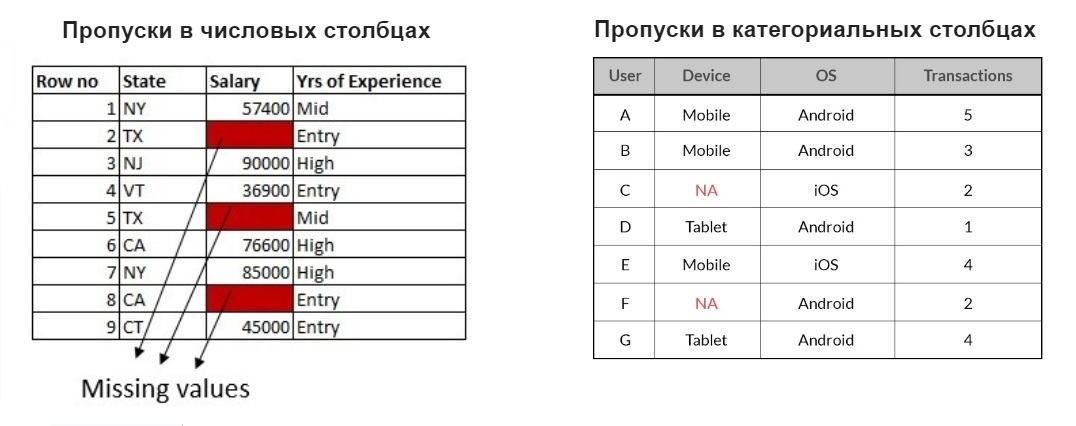

In [52]:
data_it = {
    'age': [25, np.nan, 35, 40, np.nan, 50, 10],
    'salary': [50000, 75000, np.nan, 90000, 60000, np.nan, 10000],
    'department': ['IT', 'HR', np.nan, 'IT', 'Finance', 'HR', 'HR'],
    'experience': [2, np.nan, 10, 15, 3, 20, 40]
}

df_it = pd.DataFrame(data_it)
data_it_k_mean = df_it
df_it

,age,salary,department,experience
0,25.0,50000.0,IT,2.0
1,NaN,75000.0,HR,NaN
2,35.0,NaN,NaN,10.0
3,40.0,90000.0,IT,15.0
4,NaN,60000.0,Finance,3.0
5,50.0,NaN,HR,20.0
6,10.0,10000.0,HR,40.0


In [46]:
from sklearn.impute import SimpleImputer # < -- метод за один вызов позволяет заполнить пропущенные значения

# Колличественные данные 
mean_imputer = SimpleImputer(strategy='mean')
df_it['age_mean'] = mean_imputer.fit_transform(df_it[['age']])

median_imputer = SimpleImputer(strategy='median')
df_it['salary_median'] = median_imputer.fit_transform(df_it[['salary']])

In [51]:
# Категориальные данные 
mode_imputer = SimpleImputer(strategy='most_frequent')
df_it['department_imputed'] = mode_imputer.fit_transform(df_it[['department']]).flatten()

In [ ]:
# Заполнение уникальной категории - > fillna()

In [57]:
# Заполнение с помощью другой модели -- > KNN (k-ближайших соседей) (о нем подробнее далее)
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=2)

data_it_k_mean[['age', 'salary', 'experience']] = knn_imputer.fit_transform(
    data_it_k_mean[['age', 'salary', 'experience']]
)

In [58]:
# Место для вашего кода

### Шаг 2. Нормализация данных (масштабирование данных)

Масштабы, в которых измеряются числовые величины в данных, могут быть разными. Например, в таблице выше возраст измеряется в десятках, balance - в тысячах, amount - сотнях. Сюда еще можно добавить пол клиента - 0 или 1, тогда он будет измеряться в единицах.

Видно, что признаки имеют разный масштаб. Чем это может быть плохо?

- **Некорректные результаты моделей** - при обучении KNearestNeighbors (метод кластеризации) или линейных моделей с регуляризацией
- **Медленная сходимость** - веса обновляются с разной скоростью
- **Сложность интерпретации** - в линейных моделях можно сравнивать веса только при одинаковом масштабе признаков

Выход из ситуации - масштабирование данных

#### 🔦 Методы масштабирования

1. **MinMaxScaler**

$$x \rightarrow \frac{x - min}{max - min}$$

При применении этого метода по каждому столбцу вычисляются min и max, а затем значения столбца преобразуются по формуле. При таком способе масштабирования все значения признака переходят в отрезок [0;1].

2. **StandardScaler**

$$x \rightarrow \frac{x - mean}{std}$$

При применении этого метода по каждому столбцу вычисляются среднее значение mean и стандартное отклонение std, а затем значения столбца преобразуются по формуле. При этом способе масштабирования все значения признака переходят в окрестность 0 (среднее значение становится равным нулю). Большинство значений попадет в отрезок [-3;3], если в данных нет выбросов.

#### Какой метод выбрать?
- Если в данных много выбросов, то MinMaxScaler
- Если в данных мало выбросов, то выбор модели, как правило, не столь важен 

In [25]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

data_test = {
    'age': [25, 30, 35, 40, 45, 50],
    'balance': [1000, 2500, 30000, 4500, 80000, 15000],
    'count': [0, 150, 53215, 300, 1000, 424240]
}

df_test = pd.DataFrame(data_test)

# MinMaxScaler
min_max = MinMaxScaler()
pd.DataFrame(min_max.fit_transform(df_test), columns=df_test.columns)

# StandardScaler
st_scaler = StandardScaler()
pd.DataFrame(st_scaler.fit_transform(df_test), columns=df_test.columns)

,age,balance,count
0,0.0,0.000000,0.000000
1,0.2,0.018987,0.000354
2,0.4,0.367089,0.125436
3,0.6,0.044304,0.000707
4,0.8,1.000000,0.002357
5,1.0,0.177215,1.000000


,age,balance,count
0,-1.46385,-0.764090,-0.514172
1,-0.87831,-0.709942,-0.513206
2,-0.29277,0.282774,-0.171369
3,0.29277,-0.637745,-0.512239
4,0.87831,2.087711,-0.507730
5,1.46385,-0.258708,2.218716


In [60]:
# Место для вашего кода 

### Шаг 3. Кодирование категориальных признаков

Категориальные признаки - это признаки, которые принимают значения из ограниченного набора категорий. Эти категории могут быть номинальными (без порядка) или порядковыми (с естественным порядком).

**Виды категориальных признаков:**

**Номинальные признаки**:
- Не имеют внутреннего порядка (пол, категория товаров, цвет флага и др.)
- Эти данные могут быть закодированы числами, но эти числа не имеют количественного значения и не могут быть использованы в математических операциях

**Порядковые признаки**:
- Имеют естественный порядок (уровень образования (начальное, среднее, высшее), степень удовлетворенности (низкая, средняя, высокая) и др.)
- Порядковые признаки можно сравнивать, но проводить арифметические операции (вычитание, деление) с этими данными нельзя.


**🙈 Способы кодирования категориальных признаков:**

**1. OneHot Encoding**

В этом подходе мы делаем следующее:

1. **Создаем новые колонки** - столько, сколько различных категорий присутствует в категориальном признаке
2. **Каждая колонка отвечает за отдельную категорию** 
3. **Кодируем значения**: для каждого объекта в соответствующей колонке ставим 1, а во всех остальных 0

Особенности подхода:
1. При кодировании столбца при помощи OneHot encoding мы получим линейно-зависимые столбцы.
2. "Проклятие размерности" - при большом количестве категорий мы получаем много новых числовых столбцов, что создает разряженную матрицу
3. Проблема новых категорий - если в новых данных появятся ранее не встречавшиеся категории, то модель не сможет их обработать 

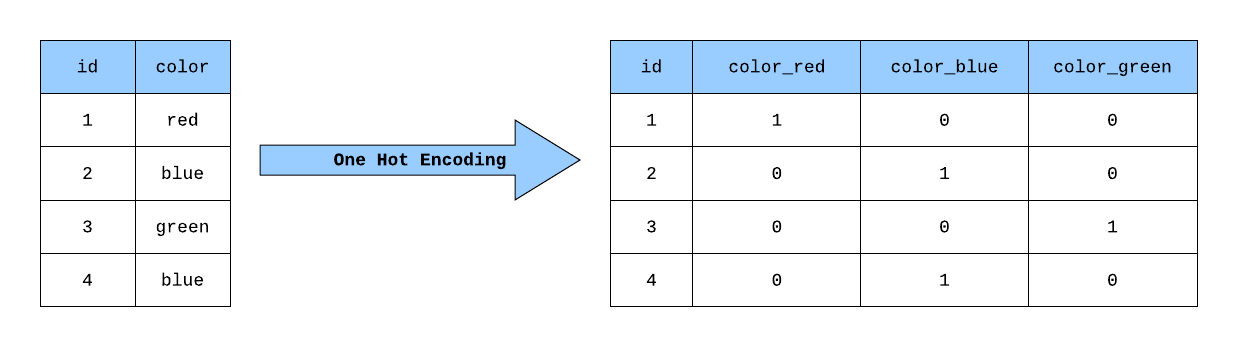

**2. Label Encoding**

В этом подходе мы делаем следующее:

1. **Создаем числовые метки** - каждой уникальной категории присваивается целочисленное значение (0, 1, 2, ...)
2. **Заменяем категории числами** - исходные категориальные значения заменяются соответствующими числовыми метками
3. **Сохраняем размерность** - количество столбцов не увеличивается

Особенности подхода:

1. **Искусственный порядок** - алгоритмы могут ошибочно интерпретировать числовые метки как имеющие естественный порядок (например, что 2 > 1 > 0)
2. **Неподходящ для линейных моделей** - линейные модели считают, что большее число имеет большее значение
3. **Подходит для древовидных моделей**

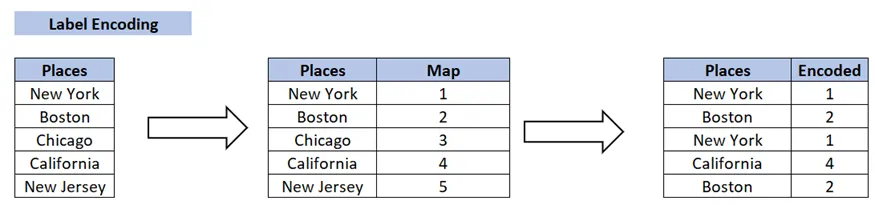

In [73]:
data_encoder = {
    'color': ['red', 'green', 'blue', 'green', 'red', 'blue'],
    'size': ['S', 'M', 'L', 'M', 'S', 'XL']
}

df_encoder = pd.DataFrame(data_encoder)

In [86]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# OneHot Encoding
onehot_encoder = OneHotEncoder(sparse_output=False)
onehot_encoded = onehot_encoder.fit_transform(df_encoder[['color']])

# Создаем DataFrame с закодированными признаками
onehot_columns = onehot_encoder.get_feature_names_out(['color'])
df_onehot = pd.DataFrame(onehot_encoded, columns=onehot_columns)

In [97]:
# Label Encoding
label_encoder = LabelEncoder()
label__encoded = label_encoder.fit_transform(df_encoder['size'])

In [98]:
# Место для вашего кода

## Часть 2. Подготовка данных для обучения

- Разделение на train/test
- в функции train_test_split() есть параметр shuffle, который перемешивает данные. Случайная перестановка точек данных позволяет избежать смещений, улучшить обобщение и сделать модели более надежными

In [101]:
# Ваш код

## Часть 3. Задача классификации

Распознавание эмоций относится к задаче **классификации**, в более общем смысле — машинного обучения **с учителем**.
- Имеются объекты (тексты) и ответы (классы эмоций), которые нужно предсказать.
- Множество допустимых ответов конечно и известно заранее.
- Требуется построить алгоритм, принимающий описание объекта и выдающий ответ.

### Логистическая регрессия

Общее назначение регрессии состоит в анализе связи между несколькими независимыми переменными и зависимой переменной. Зависимая переменная $z$ является взвешенной суммой независимых переменных $x_1,x_2,...,x_n$ (признаков). Веса $w_1, w_2, ..., w_n$ подбираются на обучающих данных — в этом и состоит обучение модели.

$$z(x) = w_1x_1 + w_2x_2 + ... + w_nx_n$$

Переменная $z$ может принимать значения в любом диапазоне. Чтобы получить вероятность отнесения объекта к классу, нужно привести его в диапазон от 0 до 1 с помощью функции активации.

**Функция активации**

В случае бинарной классификации используется сигмоида. Если получившееся значение больше 0.5, то объект относится к положительному классу, иначе — к отрицательному.

$$ σ(z(x))=\frac{1}{1+e^{-z(x)}}$$

Таким образом, логистическая регрессия преобразует **линейную комбинацию признаков** в **вероятность принадлежности объекта к положительному классу**.  

После применения сигмоидной функции получаем значение:

$$
P(y=1 \mid x) = \sigma(z(x)) = \frac{1}{1 + e^{-z(x)}}
$$

- Если $P(y=1 \mid x) > 0.5$, объект классифицируется как положительный (класс 1)  
- Если $P(y=1 \mid x) \leq 0.5$, объект классифицируется как отрицательный (класс 0)  

Вывод: Обучение модели заключается в подборе весов $w_1, w_2, ..., w_n$, чтобы **максимизировать вероятность правильной классификации всех объектов обучающей выборки**. Обычно для этого используется метод **максимального правдоподобия**.


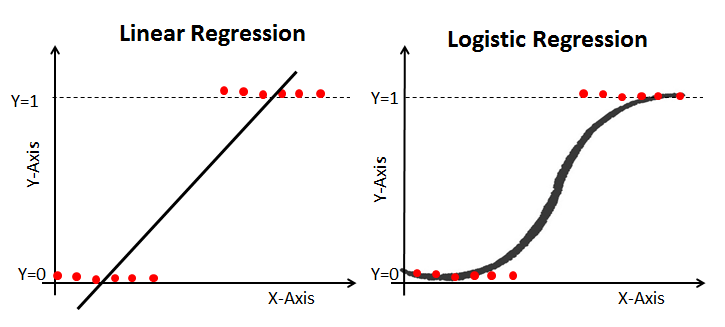

**Как работает код**

```python
# импортируем логистическую регрессию из модуля linear_model библиотеки sklearn
from sklearn.linear_model import LogisticRegression
 
# создадим объект этого класса и запишем его в переменную model
model = LogisticRegression()
 
# обучим модель
model.fit(X_train, y_train)
 
# выполним предсказание класса на тестовой выборке
y_pred = model.predict(X_test)

```

In [111]:
# Место для вашего кода

### **Матрица ошибок**

Для оценки качества классификации используется матрица ошибок.

Есть алгоритм, предсказывающий принадлежность каждого объекта одному из классов.
- $\hat y$ — предсказанный алгоритмом класс объекта
- $y$ — истинный класс объекта

Два класса делятся на положительный (1) и отрицательный (0 или –1).
- Объекты, которые алгоритм относит к положительному классу, – положительные (Positive).
- Те, которые на самом деле принадлежат к этому классу, – истинно положительные (True Positive).
- Остальные – ложно положительные (False Positive).

Аналогичная терминология для отрицательного (Negative) класса.

Таким образом, ошибки классификации бывают двух видов: False Negative (FN) и False Positive (FP).

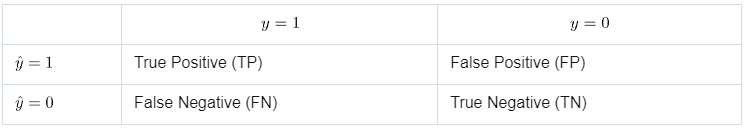

### **Метрики качества классификации**

1. **Accuracy (Точность модели в целом)**  
Доля правильных ответов алгоритма среди всех ответов (непоказательна при несбалансированных классах):

$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$


2. **Precision (Точность положительного класса)**  
Доля объектов, названных классификатором положительными и при этом действительно являющихся положительными:

$$
Precision = \frac{TP}{TP + FP}
$$


3. **Recall (Полнота / Чувствительность)**  
Доля объектов положительного класса, которые нашел алгоритм, из всех объектов положительного класса:

$$
Recall = \frac{TP}{TP + FN}
$$



4. **F-мера (F1-score)**  
Среднее гармоническое точности и полноты:

$$
F{\text -}score = 2 \cdot \frac{Precision \times Recall}{Precision + Recall}
$$


> Данная формула придает одинаковый вес точности и полноте, поэтому F-мера падает одинаково при уменьшении и точности, и полноты. Можно использовать **взвешенную F-меру**, если нужно придавать приоритет одной из метрик.


In [109]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

# Пример данных
y_true = [0, 1, 1, 0, 1, 0, 1, 1, 0, 0]  
y_pred = [0, 1, 0, 0, 1, 0, 1, 1, 0, 1] 
y_prob = [0.1, 0.9, 0.4, 0.3, 0.8, 0.2, 0.9, 0.7, 0.1, 0.6]  

# Расчет метрик
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred)
rec = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
cm = confusion_matrix(y_true, y_pred)
report = classification_report(y_true, y_pred, digits=4)

In [110]:
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0     0.8000    0.8000    0.8000         5
           1     0.8000    0.8000    0.8000         5

    accuracy                         0.8000        10
   macro avg     0.8000    0.8000    0.8000        10
weighted avg     0.8000    0.8000    0.8000        10



- **Support** — это количество **реальных экземпляров** каждого класса в тестовой выборке.

In [112]:
# Место для вашего кода

## Часть 4. Практика

В этом задании вам предлагается спрогнозировать, купит клиент велосипед или нет, обучив логистическую регрессию
- Purchased Bike - целевая переменная 

Задача: 
- Провести первичный анализ данных
- Прровести предобработку данных
- Обучить модель логистической регресии 
- Вывести метрики качества предсказания модели. 

In [104]:
# считаем данные
data = pd.read_csv('https://raw.githubusercontent.com/evgpat/edu_stepik_practical_ml/main/datasets/bike_buyers_clean.csv')